In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("churn_modeling.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# check for null values
ds.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# Remove attributes that are unique to the customer (attributes belonging to candidate keys)
ds.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [5]:
# le_geo = LabelEncoder()
# le_gender = LabelEncoder()
# ds["Geography"] = le_geo.fit_transform(ds["Geography"])
# ds["Gender"] = le_gender.fit_transform(ds["Gender"])

gender = pd.get_dummies(ds['Gender'], drop_first=True)
geography = pd.get_dummies(ds['Geography'], drop_first=True)
ds = pd.concat([ds, gender, geography], axis=1)
ds = ds.drop(['Geography', 'Gender'], axis=1)
ds.dropna(inplace = True)
ds


# both are encoding tech 
# commneted is using direct encoding while next is using dummy variables
# but both gives same accuracy at the end 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [6]:
def min_max_normalize( name ):
    global ds
    ds[name] = ds[name].astype('float32')
    ds[name] = (ds[name] - ds[name].min()) - (ds[name].max() - ds[name].min())

cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "EstimatedSalary"]
for col in cols:
    min_max_normalize(col)

In [7]:
from sklearn.model_selection import train_test_split 
X = ds.drop(["Exited"], axis=1).to_numpy().astype(np.float32) # features 

y = ds["Exited"].to_numpy() # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=200)
clf.fit(X_train, y_train)

/home/mystic/Code/lp3/ML/jupyter-venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 0 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(5, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,1e-05
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,1


In [13]:
from sklearn.metrics import accuracy_score

pred_y = clf.predict(X_test)
print(f"Accuracy is {accuracy_score(y_test, pred_y)}")

Accuracy is 0.8053333333333333


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/home/mystic/Code/lp3/ML/jupyter-venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mystic/Code/lp3/ML/jupyter-venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mystic/Code/lp3/ML/jupyter-venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

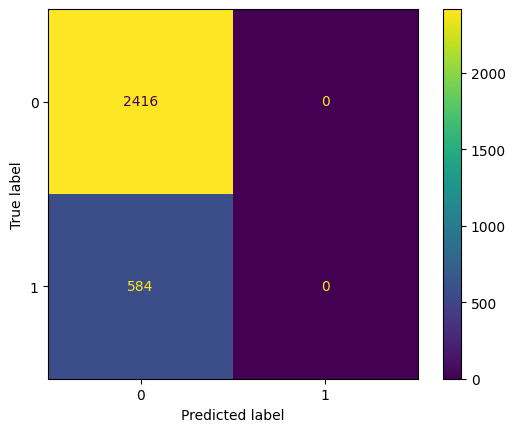

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()